* Python data visualization library to easily create the most common types of plots 
* Works well with  pandas data structures
* Built on top of  matplotlib

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set default size for figures
plt.rcParams['figure.figsize'] = (16, 7)

####  Example of countplot with customised display for hue 

In [2]:
#load dataset
eucropres = pd.read_csv('../datasets/clean/eufoodloss.csv', index_col=0)
eucropres.head(10)

,country,crop,timepointyears,percentage_loss_of_quantity,activity,fsc_location1
4,Denmark,Wheat,2017,NaN,NaN,Farm
5,Denmark,"Peas, green",2017,NaN,NaN,Farm
6,Denmark,"Peas, green",2017,NaN,NaN,Pre-Harvest
7,Denmark,"Peas, green",2017,NaN,NaN,Harvest
8,Denmark,"Peas, green",2017,NaN,NaN,Processing
9,Denmark,"Peas, green",2017,NaN,NaN,Distribution
10,Denmark,Carrots and turnips,2017,NaN,NaN,Harvest
11,Denmark,Carrots and turnips,2017,NaN,NaN,Farm
12,Denmark,"Onions and shallots, green",2017,NaN,NaN,Pre-Harvest
13,Denmark,"Onions and shallots, green",2017,NaN,NaN,Harvest


In [3]:
#create a dictionary with colours for years in dataset
years = list(eucropres.timepointyears.unique())
colors = ['blue', 'green', 'red', 'magenta', 'black']
hue_colours = dict(zip(years, colors))
display(years)
display(hue_colours)

#set hue_order
hue_order = list(eucropres.timepointyears.sort_values(ascending=False).unique())
display(hue_order)

[2017, 2014, 2010, 2009, 2015]

{2017: 'blue', 2014: 'green', 2010: 'red', 2009: 'magenta', 2015: 'black'}

[2017, 2015, 2014, 2010, 2009]

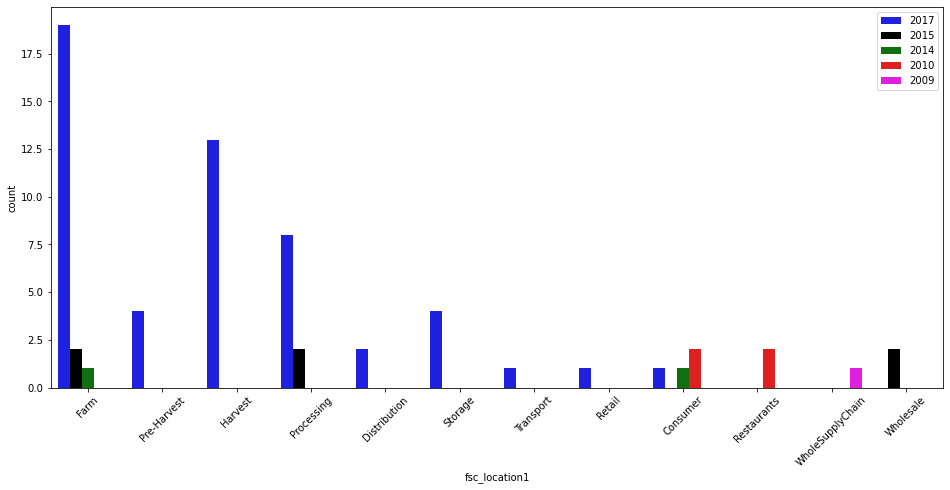

In [4]:
# example of countplot
sns.countplot(x="fsc_location1", data=eucropres, hue="timepointyears", palette=hue_colours, hue_order=hue_order) 
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

### Relplot -scatter depending on up to 7 variables
1. x values
2. y values
3. hue (i.e. colour)
4. size
5. col
6. row
7. style

* if the dots on the scatterplot overlap use alpha (transparency)

In [5]:
#load dataset
eucrops = pd.read_csv('../datasets/clean/eu_data_crops.csv', header=0, 
            usecols=['Area', 'Item', 'Element', 'Unit', 'yearly_average_1961-2019', 'std_1961-2019' ])
display(eucrops.shape, eucrops.head())
sm_eucrops = eucrops[eucrops['yearly_average_1961-2019'] < eucrops['yearly_average_1961-2019'].median()]

(10557, 6)

,Area,Item,Element,Unit,yearly_average_1961-2019,std_1961-2019
0,Albania,Apples,Area harvested,ha,3339.63,1256.38
1,Albania,Apples,Yield,hg/ha,99296.09,73218.47
2,Albania,Apples,Production,tonnes,26934.61,28286.50
3,Albania,Apricots,Area harvested,ha,388.60,105.40
4,Albania,Apricots,Yield,hg/ha,68517.34,54603.45


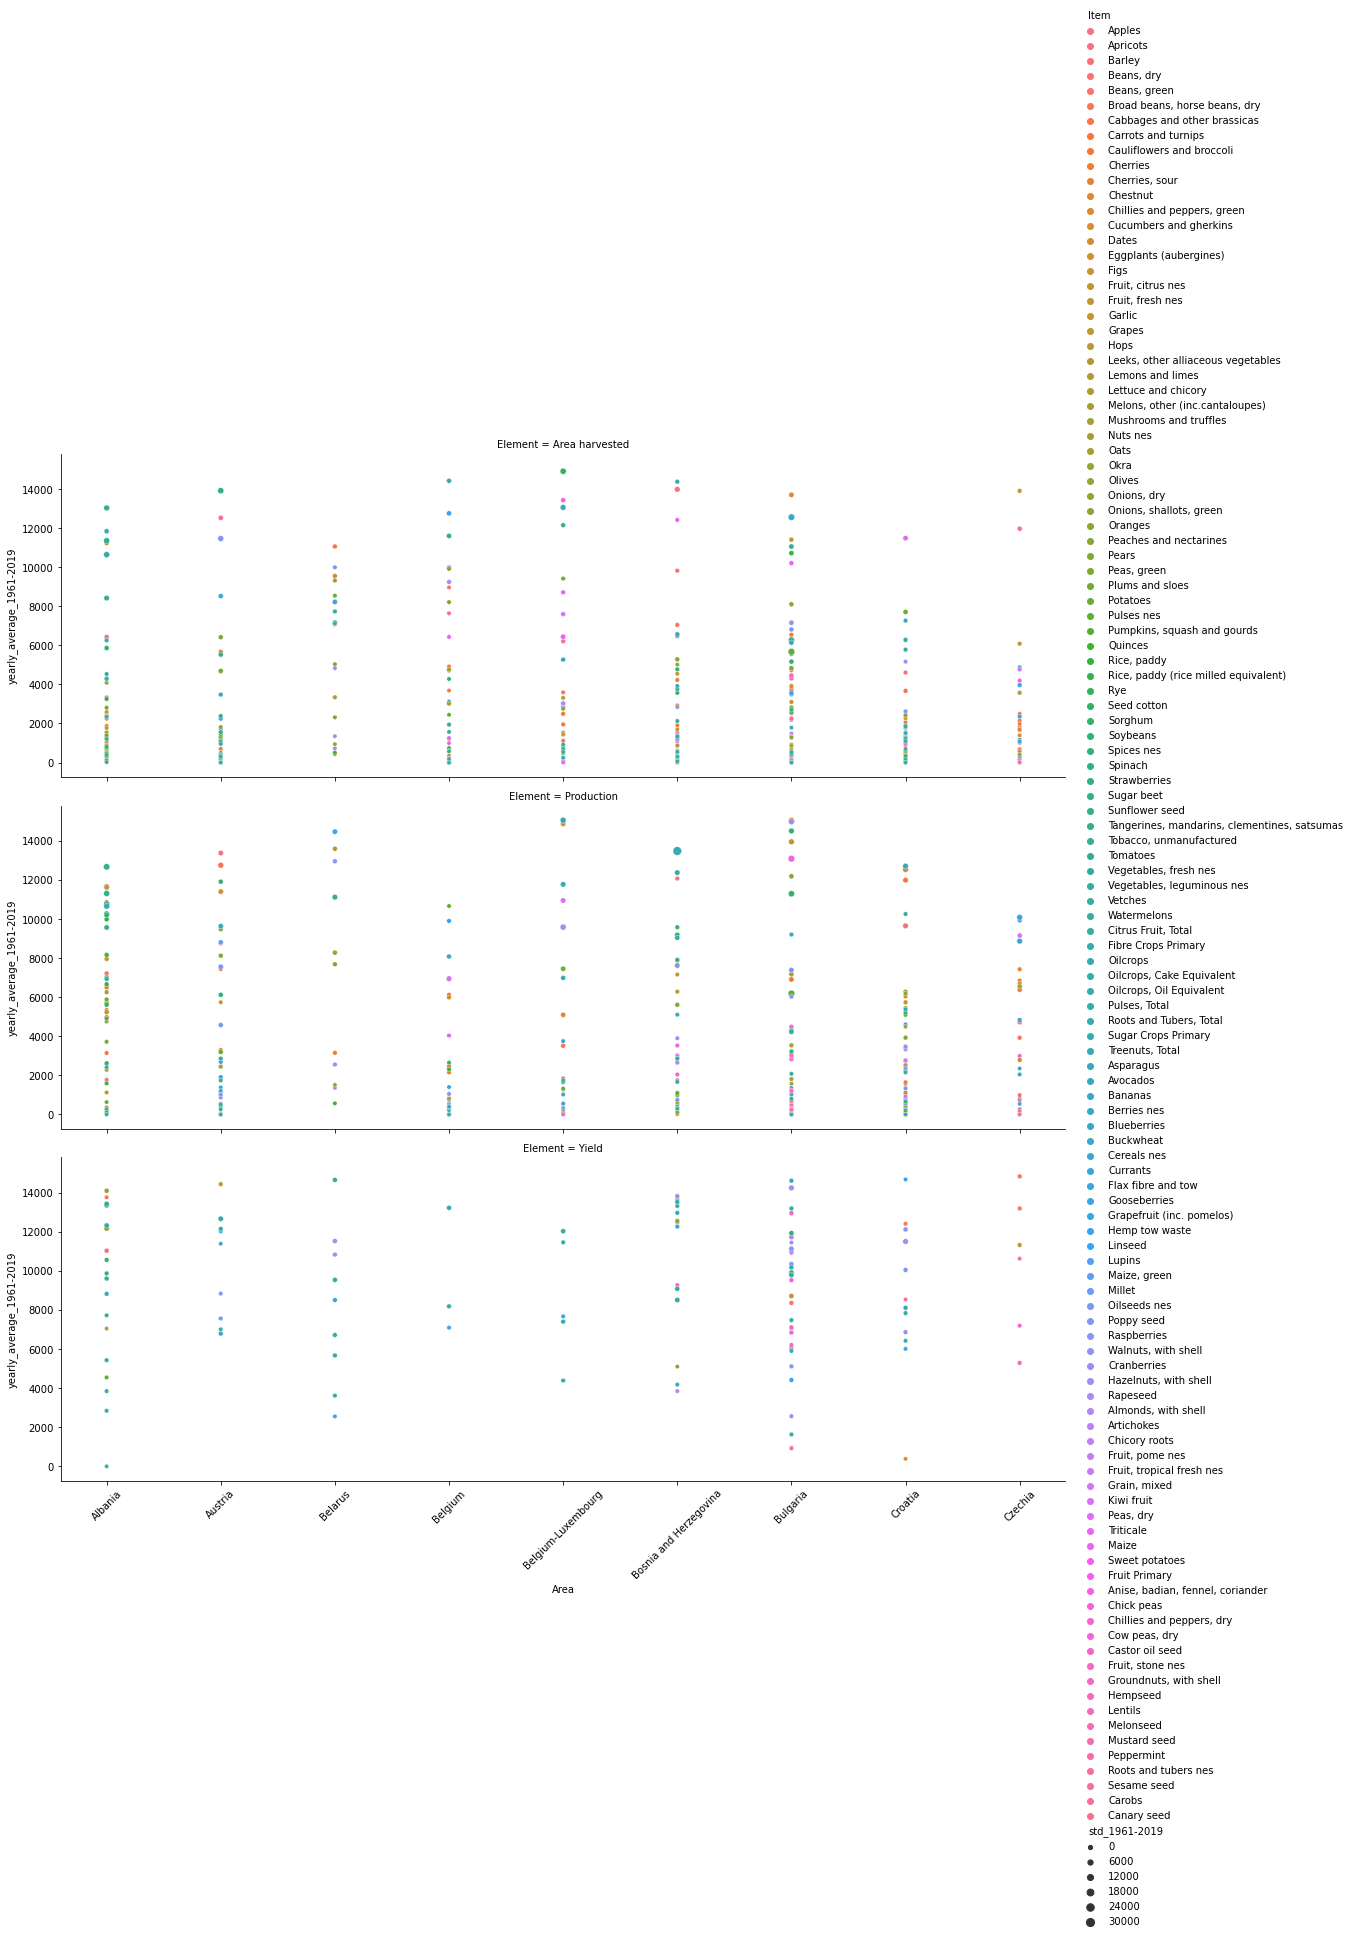

In [6]:
# example of relplot
sns.relplot(x="Area", y='yearly_average_1961-2019', data=sm_eucrops[:1000], kind='scatter', aspect=3,
             hue="Item", size='std_1961-2019', 
             row='Element') 
plt.xticks(rotation=45)
plt.show()

### Relplot -line

In [7]:
#load dataset
euprod = pd.read_csv('../datasets/clean/strawberries_over_years_eu.csv', index_col=0, header=0, parse_dates=True)
euprod.head()

,Area,Item,Element,Unit,Year,Value
0,Albania,Strawberries,Area harvested,ha,2017,102.0
1,Albania,Strawberries,Area harvested,ha,2018,111.0
2,Albania,Strawberries,Area harvested,ha,2019,121.0
3,Albania,Strawberries,Yield,hg/ha,2017,498922.0
4,Albania,Strawberries,Yield,hg/ha,2018,395766.0


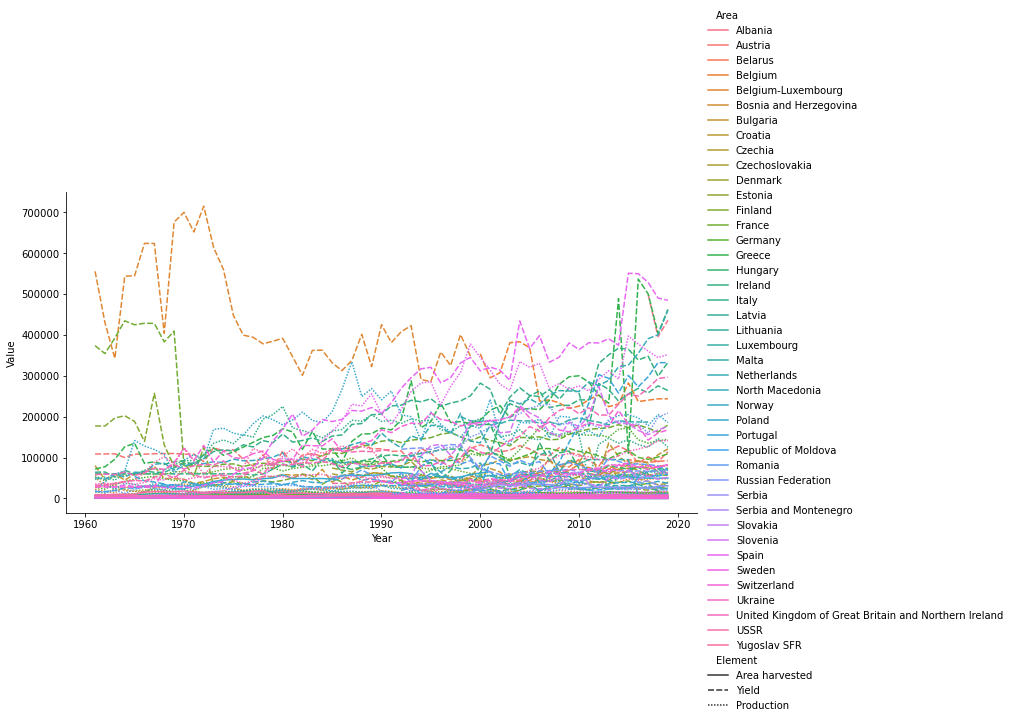

In [8]:
sns.relplot(x='Year', y='Value', data=euprod, kind='line', ci=None,  
            aspect=2, hue='Area', style='Element')                                        
# default: mean and 95% CI, ci is the confidence interval
plt.show()

### Catplot: Categorical plots 

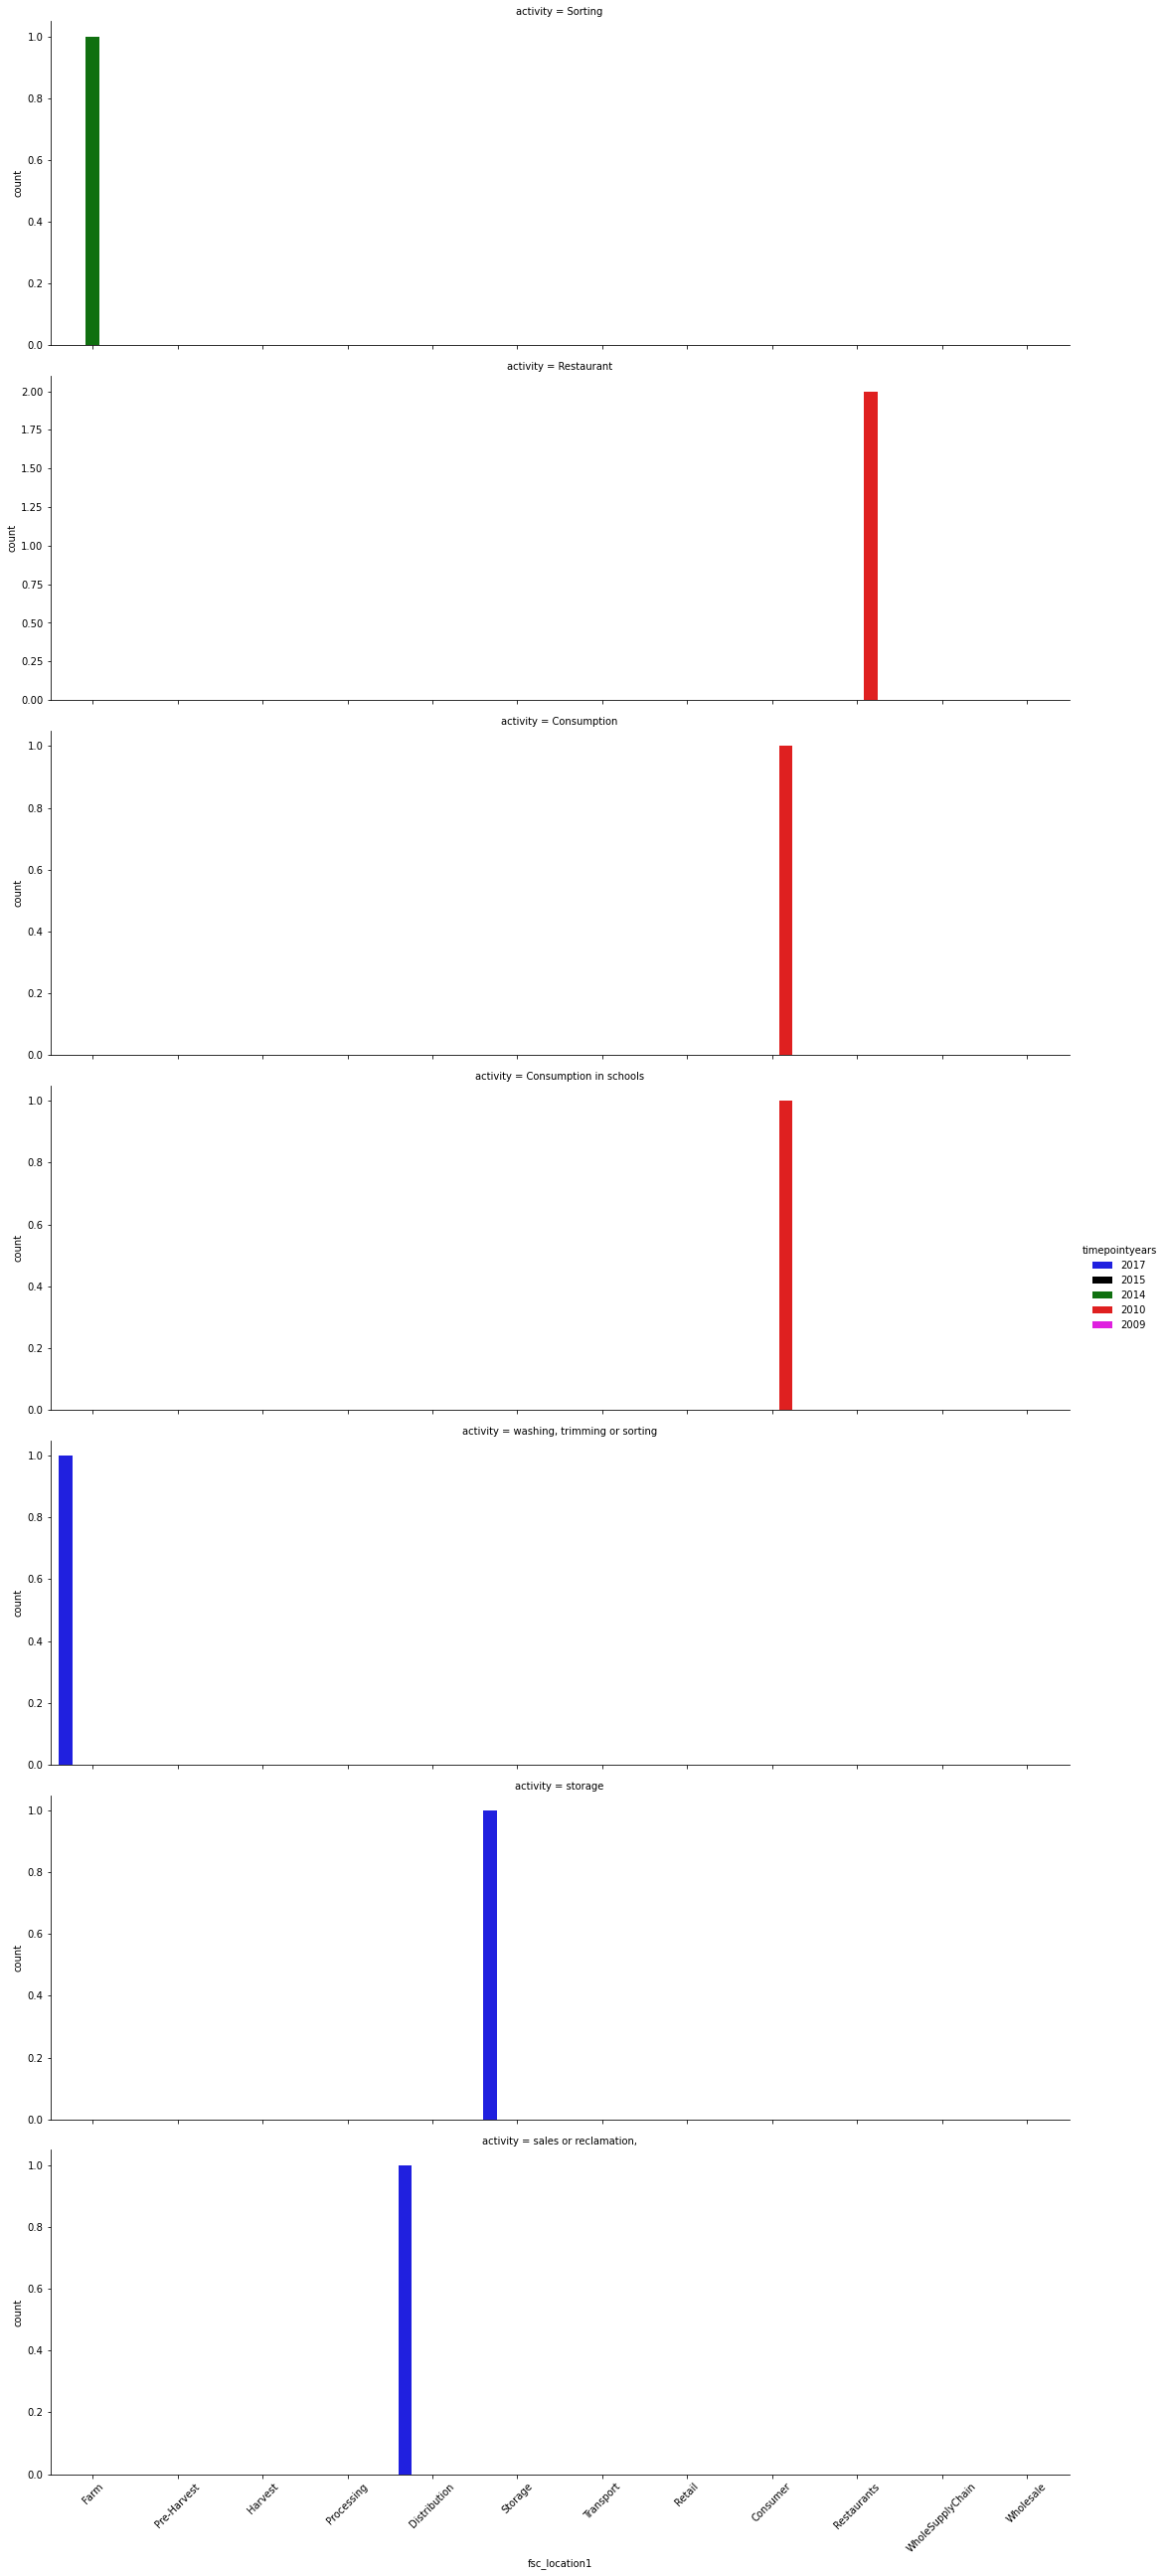

In [76]:
# example of catplot
sns.catplot(x="fsc_location1", data=eucropres, kind='count', aspect=3, row='activity',
            hue="timepointyears", palette=hue_colours, hue_order=hue_order, sharey=True) 
plt.xticks(rotation=45)
plt.show()

In [59]:
# load dataset
simplestr = pd.read_csv('../datasets/clean/strawberries_over_years_eu.csv', header=0, parse_dates=['Year'], index_col='Year')
simplestrprod = simplestr[simplestr.Element =='Production']
simplestrprod.head()

,Unnamed: 0,Area,Element,Unit,Value
Year,,,,,
2017-01-01,6,Albania,Production,tonnes,5089.0
2018-01-01,7,Albania,Production,tonnes,4393.0
2019-01-01,8,Albania,Production,tonnes,5273.0
1961-01-01,127,Austria,Production,tonnes,5000.0
1962-01-01,128,Austria,Production,tonnes,5000.0


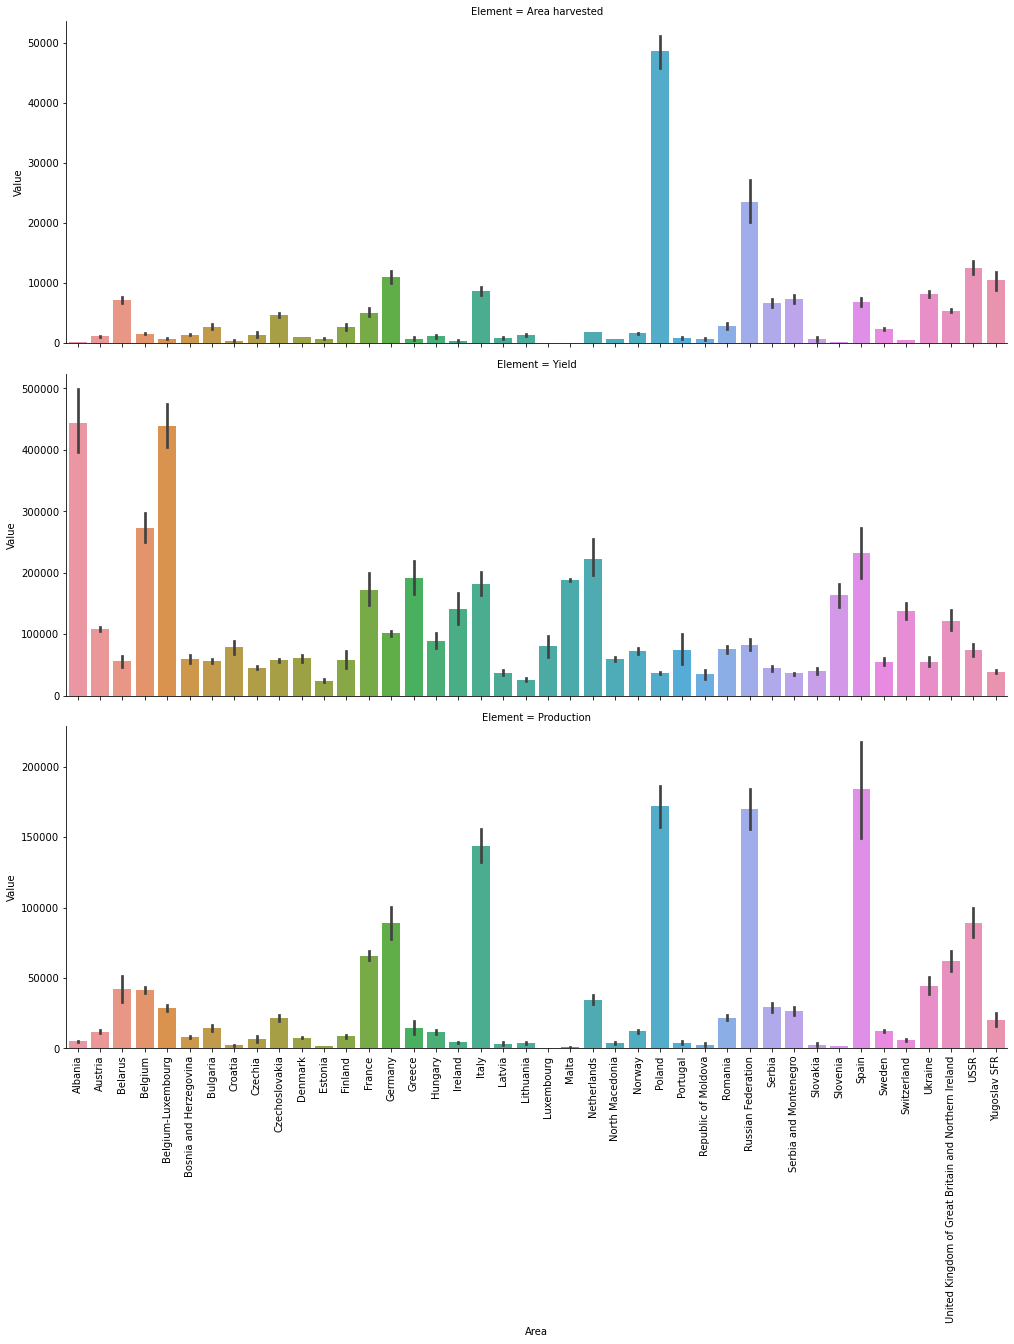

In [77]:
sns.catplot(x='Area', y='Value', data=simplestr, kind='bar', aspect=3, row='Element', sharey=False) 
# Displays mean of quantitative variable per category and shows uncertainty about our estimate
# Lines show 95% conidence intervals for the mean unless ci=None
plt.xticks(rotation=90)
plt.show()

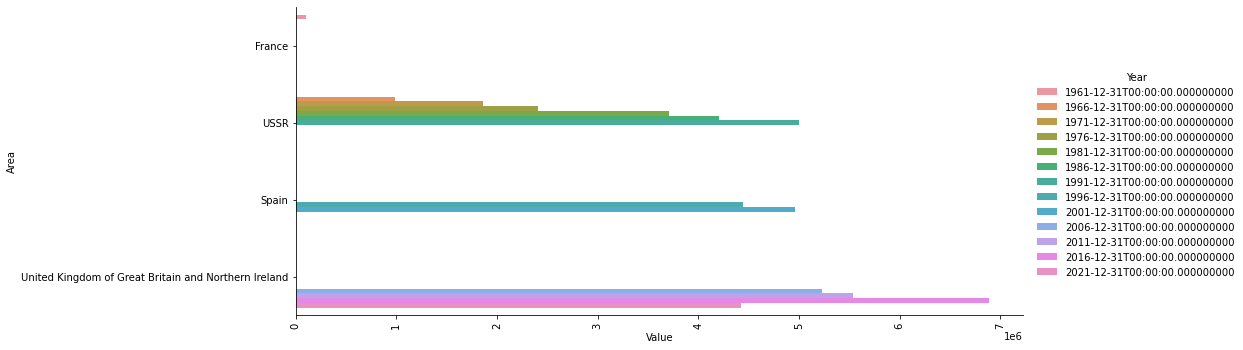

In [71]:
simp_strpr_chunk = simplestrprod[simplestrprod.Value > 50000]
simp_strpr_chunk = simp_strpr_chunk.resample('5Y').agg({'Area':'last', 'Value':'sum'}).reset_index()
simp_strpr_chunk.head()
sns.catplot(x='Value',y='Area',  data=simp_strpr_chunk, kind='bar', ci=None, aspect=3, hue='Year') 
plt.xticks(rotation=90)
plt.show()

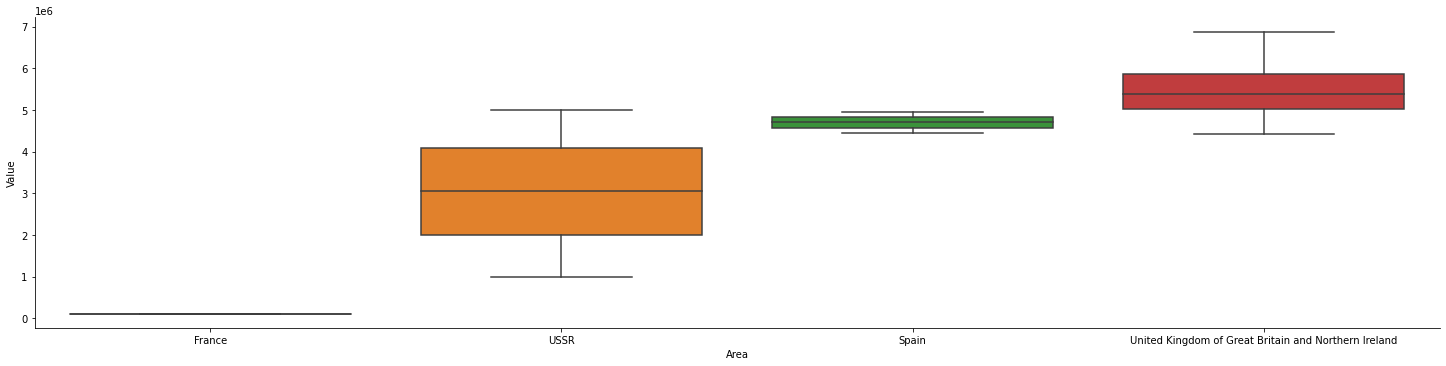

In [79]:
sns.catplot(x='Area', y='Value', data=simp_strpr_chunk, kind="box", aspect=4, whis=[0, 100]) 
plt.show()